<a href="https://colab.research.google.com/github/BautistaBertolami/Cap4630AI/blob/master/HW3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3

Problem 1

get_random_data generates two matrices, one is data, which consists of the $x1$ and $x2$ features, the other is labels wich contains either a $0$ or $1$

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def get_random_data(w, b, mu, sigma, m):
  labels = np.zeros((m, 1))
  data = np.zeros((m, 2))

  for i in range (0, m):
    #stores the labels
    c = np.random.randint(0, 2)
    labels[i] = c

    #creates the data
    x_1 = np.random.uniform(0.0, 1.0, 1)
    data[i][0] = x_1

    #generate n according to sigma and mean mu
    #n = np.random.uniform(mu - sigma, mu + sigma)
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + pow(-1, c) * n
    data[i][1] = x_2
  
  return data, labels


#print(get_random_data(1, 3, 3, 5, 6)[1])


display_random_data plots the points according to $x1$ and $x2$, and the line is plotted according to point $x = 0$ and point $x = 1$, using $y = mx + b$

In [0]:
def display_random_data(data, labels, w, b):
  fig = plt.figure(figsize = (5, 5))
  axs = plt.axes()
  x = np.linspace(0, 1, 2)
  y = x * w + b
  plt.plot(x, y, "green")
  for i in range(0, data.shape[0]):
    color = "red"
    if labels[i] == 0:
      color = "blue"
    axs.scatter(data[i][0], data[i][1], c = color)

def display_trained_line(data, labels, w1, w2, b):
  fig = plt.figure(figsize = (5, 5))
  axs = plt.axes()
  x = [0] * 2
  y = [0] * 2
  x[0] = 0
  x[1] = 1
  y = (-(w1 * x)-b)/w2

  plt.plot(x, y, "green")
  for i in range(0, data.shape[0]):
    color = "red"
    if labels[i] == 0:
      color = "blue"
    axs.scatter(data[i][0], data[i][1], c = color)

split_data splits an array into 2 arrays one of 80% of the arrays items, and the other 20% of the arrays items.\
This is used to split the labels and data into train_data (80% of the data), test_data (20% of the data), train_labels (80% of the labels), and test_labels(20% of the labels)

In [0]:
def split_data(percent, arr):
  split = int(arr.shape[0] * percent)
  train = arr[:split]
  test = arr[split:]
  return train, test

Displaying first all data, then only the test data, and finally only the train data

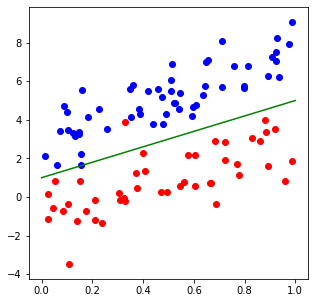

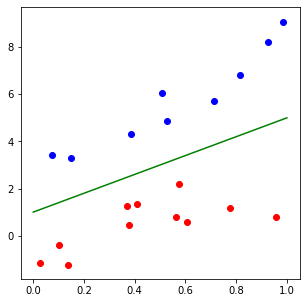

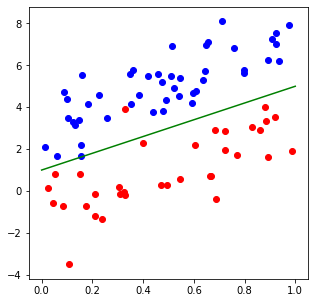

In [0]:
#generate random data
data, labels = get_random_data(4, 1, 2, 1, 100)
train_data, test_data = split_data(0.8, data)
train_labels, test_labels = split_data(0.8, labels)

#all data
display_random_data(data, labels, 4, 1)

#test data
display_random_data(test_data, test_labels, 4, 1)

#train data
display_random_data(train_data, train_labels, 4, 1)

Problem 2

Creating a sequential model using the sigmoid activation function, therefore using logisitc regression with stchastic gradient descent

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

m = 80
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation = "sigmoid", input_dim = 2))
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics = ["accuracy"])

history = model.fit(train_data, train_labels, epochs = 25)

Train on 80 samples
Epoch 1/25
80/80 [==============================] - 0s 3ms/sample - loss: 0.5527 - accuracy: 0.7500
Epoch 2/25
80/80 [==============================] - 0s 119us/sample - loss: 0.5449 - accuracy: 0.7500
Epoch 3/25
80/80 [==============================] - 0s 118us/sample - loss: 0.5380 - accuracy: 0.7500
Epoch 4/25
80/80 [==============================] - 0s 100us/sample - loss: 0.5317 - accuracy: 0.7500
Epoch 5/25
80/80 [==============================] - 0s 85us/sample - loss: 0.5250 - accuracy: 0.7500
Epoch 6/25
80/80 [==============================] - 0s 78us/sample - loss: 0.5192 - accuracy: 0.7500
Epoch 7/25
80/80 [==============================] - 0s 93us/sample - loss: 0.5131 - accuracy: 0.7500
Epoch 8/25
80/80 [==============================] - 0s 89us/sample - loss: 0.5065 - accuracy: 0.7500
Epoch 9/25
80/80 [==============================] - 0s 95us/sample - loss: 0.5007 - accuracy: 0.7500
Epoch 10/25
80/80 [==============================] - 0s 104us/sample 

Accuracy and Loss through different epochs, loss decreases and accuracy increases (Original code by Pawel Wocjan)

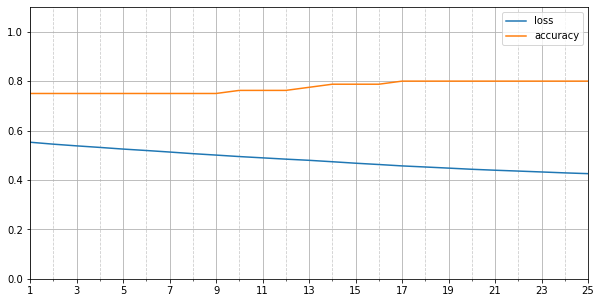

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

plt.gca().set_ylim(0, 1.1) 
plt.gca().set_xlim(0, 24)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

Separation Line

[array([[ 0.8409815],
       [-0.7350353]], dtype=float32), array([0.1641048], dtype=float32)]
[0.8409815]
[-0.7350353]
[0.1641048]


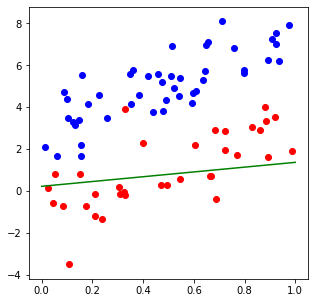

In [0]:
weights = model.get_weights()
print(weights)
print(weights[0][0])
print(weights[0][1])
print(weights[1])

display_trained_line(train_data, train_labels, weights[0][0], weights[0][1], weights[1])

Heatmap

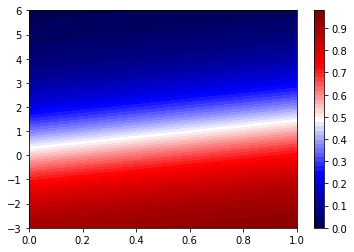

In [0]:
def sigma(z):
  return 1 / (1 + np.exp(-z))
  
def f(x, y):
  return sigma(weights[0][0] * x + weights[0][1] * y + weights[1])

x = np.linspace(0, 1, 100)
y = np.linspace(-3, 6, 100)

x, y = np.meshgrid(x, y)
z = f(x, y)

plt.contourf(x, y, z, 50, cmap = 'seismic')
plt.colorbar()

Problem 3 \
display_random_data2 is used to display the line of best fit using two weights instead of one like in problem 1

In [0]:
def display_random_data2(data, labels, w1, w2, b):
  fig = plt.figure(figsize = (5, 5))
  axs = plt.axes()
  x = [0] * 2
  y = [0] * 2
  x[0] = 0
  x[1] = 1
  y = (-(w1 * x)-b)/w2

  plt.plot(x, y, "magenta")
  for i in range(0, data.shape[0]):
    color = "red"
    if labels[i] == 0:
      color = "blue"
    axs.scatter(data[i][0], data[i][1], c = color)

    

Defining formulas

In [0]:
def sigma(z):
  return 1 / (1 + np.exp(-z))

def binaryCrossEntropyLoss(a, test_label):
  return (-1 * test_label * np.log(a)) - (1 - test_label) * np.log(1 - a)

Creating and training the model

In [0]:
lr = 0.01
epochs = 30

w1 = 0
w2 = 0
b = 0
loss = [0] * epochs
accuracy = [0] * epochs

for epoch in np.arange(epochs):
  #display_random_data(data, labels, w, b)
  for i in np.arange(80):
    z = w1 * data[i][0] + w2 * data[i][1] + b
    a = sigma(z)

    guess = a
    loss[epoch] += binaryCrossEntropyLoss(a, labels[i])
    if guess > 0.5:
      guess = 1
    else:
      guess = 0
    
    if(guess == labels[i]):
      accuracy[epoch] +=  1

    grad_w1 = (a - labels[i]) * data[i][0]
    grad_w2 = (a - labels[i]) * data[i][1]
    grad_b = (a - labels[i])
    
    w1 = w1 - (lr * grad_w1)
    w2 = w2 - (lr * grad_w2)
    b = b - (lr * grad_b)
  
  loss[epoch] = loss[epoch]/80
  accuracy[epoch] = accuracy[epoch]/80


Displaying the separation line created through training (magenta) first on all data, and then on the test data only, and finally for comparison showing the line used to originally generate the data (green)

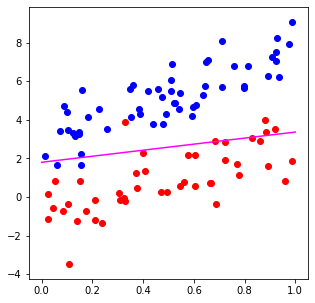

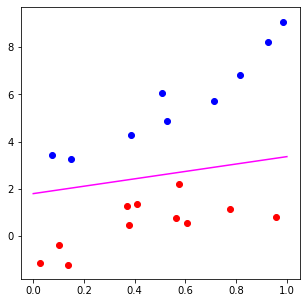

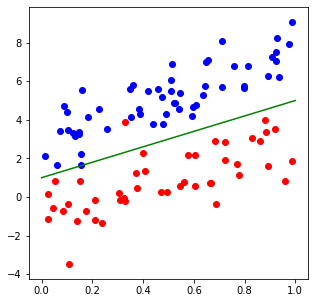

In [0]:
display_random_data2(data, labels, w1, w2, b)
display_random_data2(test_data, test_labels, w1, w2, b)
display_random_data(data, labels, 4, 1)

Heatmap

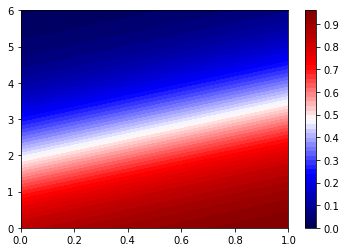

In [0]:
def f(x, y):
  return sigma(w1 * x + w2 * y + b)

x = np.linspace(0, 1, 100)
y = np.linspace(0, 6, 100)

x, y = np.meshgrid(x, y)
z = f(x, y)

plt.contourf(x, y, z, 50, cmap = 'seismic')
plt.colorbar()

Accuracy(orange) and Loss(blue)

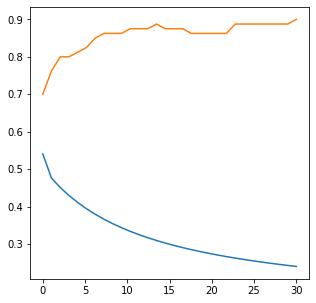

In [0]:
fig = plt.figure(figsize = (5, 5))
axs = plt.axes()
epochs = np.linspace(0, epochs, 30)

plt.plot(epochs, loss)
plt.plot(epochs, accuracy)
